<a href="https://colab.research.google.com/github/HernanJMaurice/androidSensors/blob/main/HPC/Maurice_Hernan_Ejercicio_2_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introduccion

Este ejercicio realiza una comparacion entre dos imagenes. Y muestra una imagen con todas las diferencias entre ambas. Realiza una resta entre las imagenes y marca las diferencias entre estas en una nueva. 

El ruido digital es la variación aleatoria del brillo o el color en las imágenes digitales producido por la camara. Debido a ésto puede que dos fotos que hayan capturado lo mismo, se vean diferentes. Para evitar que se marquen diferencias que no existen se debe ingresar un valor (Umbral Diferencia) el cual representa el valor minimo de variacion que deben tener los pixeles para ser considerados como diferentes.

Este tipo de aplicaciones se usa en el campo Astrofotografico. La diferencia entre fotos en los astros es uno de los metodos que permite visualizar asteroides ya que eliminaria todas las estrellas que se encuentren estaticas en ambas fotos, dejando solo al/los asteroides.

Las fotos deben tener la mismas dimensiones, ya que si no no se podria comparar pixel por pixel.

# 2 Armado del Ambiente

Primero Cargue ambas imagenes en la seccion de parametros. Luego ingrese el umbral de diferencia que desea. Luego de esto, ejecute.

Para pruebas se subieron fotos al directorio Github, las mismas se pueden ver en este link:

https://github.com/HernanJMaurice/androidSensors/tree/main/HPC/imagenes

Solo deberia agregar: El nombre de la imagen + ?raw=true
Ejemplo:
  https://github.com/HernanJMaurice/androidSensors/tree/main/HPC/imagenes/image1.jpeg?raw=true


# 3.1 Parametros

In [ ]:
#@title ## Parametros
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_primer_imagen = "https://github.com/HernanJMaurice/androidSensors/blob/main/HPC/imagenes/image1.jpeg?raw=true" #@param {type:"string"}
url_segunda_imagen = "https://github.com/HernanJMaurice/androidSensors/blob/main/HPC/imagenes/image2.jpeg?raw=true" #@param {type:"string"}
umbral_diferencia =  20#@param {type:"number"}

# TODO: Mejorar información y resultado de ejecución. 
!wget {url_primer_imagen} -O imagen1.jpeg
!wget {url_segunda_imagen} -O imagen2.jpeg

--2020-11-20 19:03:29--  https://github.com/HernanJMaurice/androidSensors/blob/main/HPC/imagenes/image1.jpeg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HernanJMaurice/androidSensors/raw/main/HPC/imagenes/image1.jpeg [following]
--2020-11-20 19:03:29--  https://github.com/HernanJMaurice/androidSensors/raw/main/HPC/imagenes/image1.jpeg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HernanJMaurice/androidSensors/main/HPC/imagenes/image1.jpeg [following]
--2020-11-20 19:03:29--  https://raw.githubusercontent.com/HernanJMaurice/androidSensors/main/HPC/imagenes/image1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.git

# 3.2 Ejecucion


Imagen del filtro: imagen1.jpeg -RGB- [960, 1280]
Imagen del filtro: imagen2.jpeg -RGB- [960, 1280]
Tiempo de conversión de imagen: 12753.237 [ms]
Tiempo Total: 12877.175 [ms]


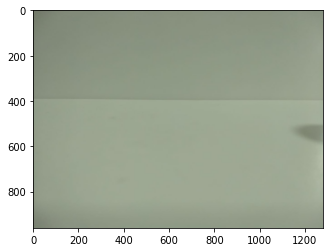

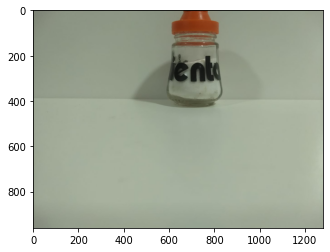

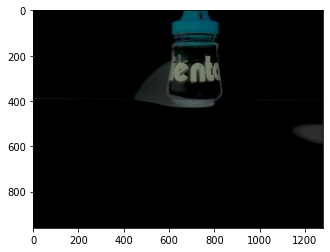

In [ ]:
 try:
      %matplotlib inline

      #--------------------------------------------
      #                 Imports
      #--------------------------------------------

      from datetime import datetime
      import  matplotlib.pyplot as plt
      import numpy
      from PIL import Image 



      tiempo_total = datetime.now()
      # --------------------------------------------
      # Definición de función que transforma el tiempo en  milisegundos 
      tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
      # --------------------------------------------

      if umbral_diferencia < 0 :
            raise Exception("El campo Umbral debe ser positivo o 0.")

      #---------------------------------------------
      #           Primera Imagen
      #---------------------------------------------

      img_nombre = 'imagen1.jpeg'
      image1 = Image.open( img_nombre ) 
        
      # Optengo las proporsiones de la imagen. 
      img1_alto, img1_ancho = image1.size 

      # Convierto la imagen comprimida en JPEG/PNG a array.
      img1_pic_cpu = numpy.asarray(image1)

      # Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
      img1_picR_cpu = numpy.empty_like( img1_pic_cpu)

      # Muestro los atributos de la imagen y como se ve antes del seudo filtro.
      print("Imagen del filtro: " + img_nombre + " -" + image1.mode + "- [" + str(img1_ancho) + ", " + str(img1_alto ) + "]" )  

      plt.figure()
      imgplot=plt.imshow( img1_pic_cpu )


      #---------------------------------------------
      #           Segunda Imagen
      #---------------------------------------------

      img_nombre = 'imagen2.jpeg'
      image2 = Image.open( img_nombre ) 
        
      # Optengo las proporsiones de la imagen. 
      img2_alto, img2_ancho = image2.size 

      # Convierto la imagen comprimida en JPEG/PNG a array.
      img2_pic_cpu = numpy.asarray(image2)

      # Muestro los atributos de la imagen y como se ve antes del seudo filtro.
      print("Imagen del filtro: " + img_nombre + " -" + image2.mode + "- [" + str(img2_ancho) + ", " + str(img2_alto ) + "]" )  

      plt.figure()
      imgplot=plt.imshow( img2_pic_cpu )

      #---------------FIN IMAGENES----------------

      if (img2_alto != img1_alto) or (img2_ancho != img1_ancho):
            raise Exception("Las imagenes deben tener las mismas medidas.")

      tiempo_img = datetime.now()

      # Realizo la comparacion de las imagenes.
      for y  in range( 0, img1_alto ):
        for x in range( 0, img1_ancho ):
          pixel1_R, pixel1_G, pixel1_B = img1_pic_cpu[x][y]
          pixel2_R, pixel2_G, pixel2_B = img2_pic_cpu[x][y]

          if pixel2_R > pixel1_R :
              pr = pixel2_R - pixel1_R
          else:
             pr = pixel1_R - pixel2_R

          if pixel2_G > pixel1_G :
              pg = pixel2_G - pixel1_G
          else:
             pg = pixel1_G - pixel2_G

          if pixel2_B > pixel1_B :
              pb = pixel2_B - pixel1_B
          else:
              pb = pixel1_B - pixel2_B

          if pr < umbral_diferencia :
              pr = 0

          if pg < umbral_diferencia :
              pg = 0

          if pb < umbral_diferencia :
              pb = 0

          img1_picR_cpu[x][y] = [pr, pg, pb]

      tiempo_img = datetime.now() - tiempo_img

      # Muestro la imagen luego de aplicarle el filtro.
      plt.figure()
      imgplot = plt.imshow( img1_picR_cpu )

      tiempo_total = datetime.now() - tiempo_total

      print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
      print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )

except ModuleNotFoundError:
    print( "ERROR: Instale el modulo de CUDA de Python." )
except FileNotFoundError:
    print('ERROR: Por favor importe las imagenes a comparar.')
except NameError:
    print('ERROR: Por favor ingrese un Umbral como parametro.')
except Exception as e:
    print('ERROR: ' ,e.args)

# 4 Tabla de pasos de ejecución del programa


 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de la dirección URL de la imagen (jpg) a procesar.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre el archivo de la imagen 1.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.empty_like(()   | Genera el array destino, que tendrá a la imagen resultado. 
CPU      |  Image.open()          | Abre el archivo de la imagen 2.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  print()               | Informa los atributos de las imagenes.
CPU      |  plt.imshow            | Muestra la imagen 1 original.
CPU      |  plt.imshow            | Muestra la imagen 2 original.
CPU      |  for...for..           | Realiza la resta de ambas imagenes y guarda la diferencia en el pixel que esta calculando.
CPU      |  plt.imshow            | Muestra la imagen resultado.

# 5 Conclusiones
 
 La diferencia entre imagenes para mostrar las variaciones se realiza comparando cada color de pixel por cada color del mismo pixel de la otra imagen. Se puede imaginar el acceso a cada pixel como una matriz. Cada imagen tiene un ancho(x) y un alto (y) para acceder a cada pixel se recorre cada "Fila y columna" (de pixeles) que posee la imagen. 

 La comparacion se realiza restando ambos pixeles, si en ambos pixeles no hubo cambio la esta daria 0. Como las camaras fotograficas introducen un ruido en la imagen, aunque lo capturado sea exactamente igual puede que la resta no de 0. Por lo que luego de la resta se compara el resultado con el umbral ingresado y en caso de ser menor, se lo toma como si la resta hubiese dado 0, si da mayor al umbral, se lo toma como que hay una diferencia.

 Se realizaron 16 ejecuciones de este algoritmo y se consiguio un promedio de tiempo de ejecucion del algoritmo de procesamiento de las imagenes de 12900 MS. Oscilando cada ejecucion entre 12700 MS y 13500 MS.

 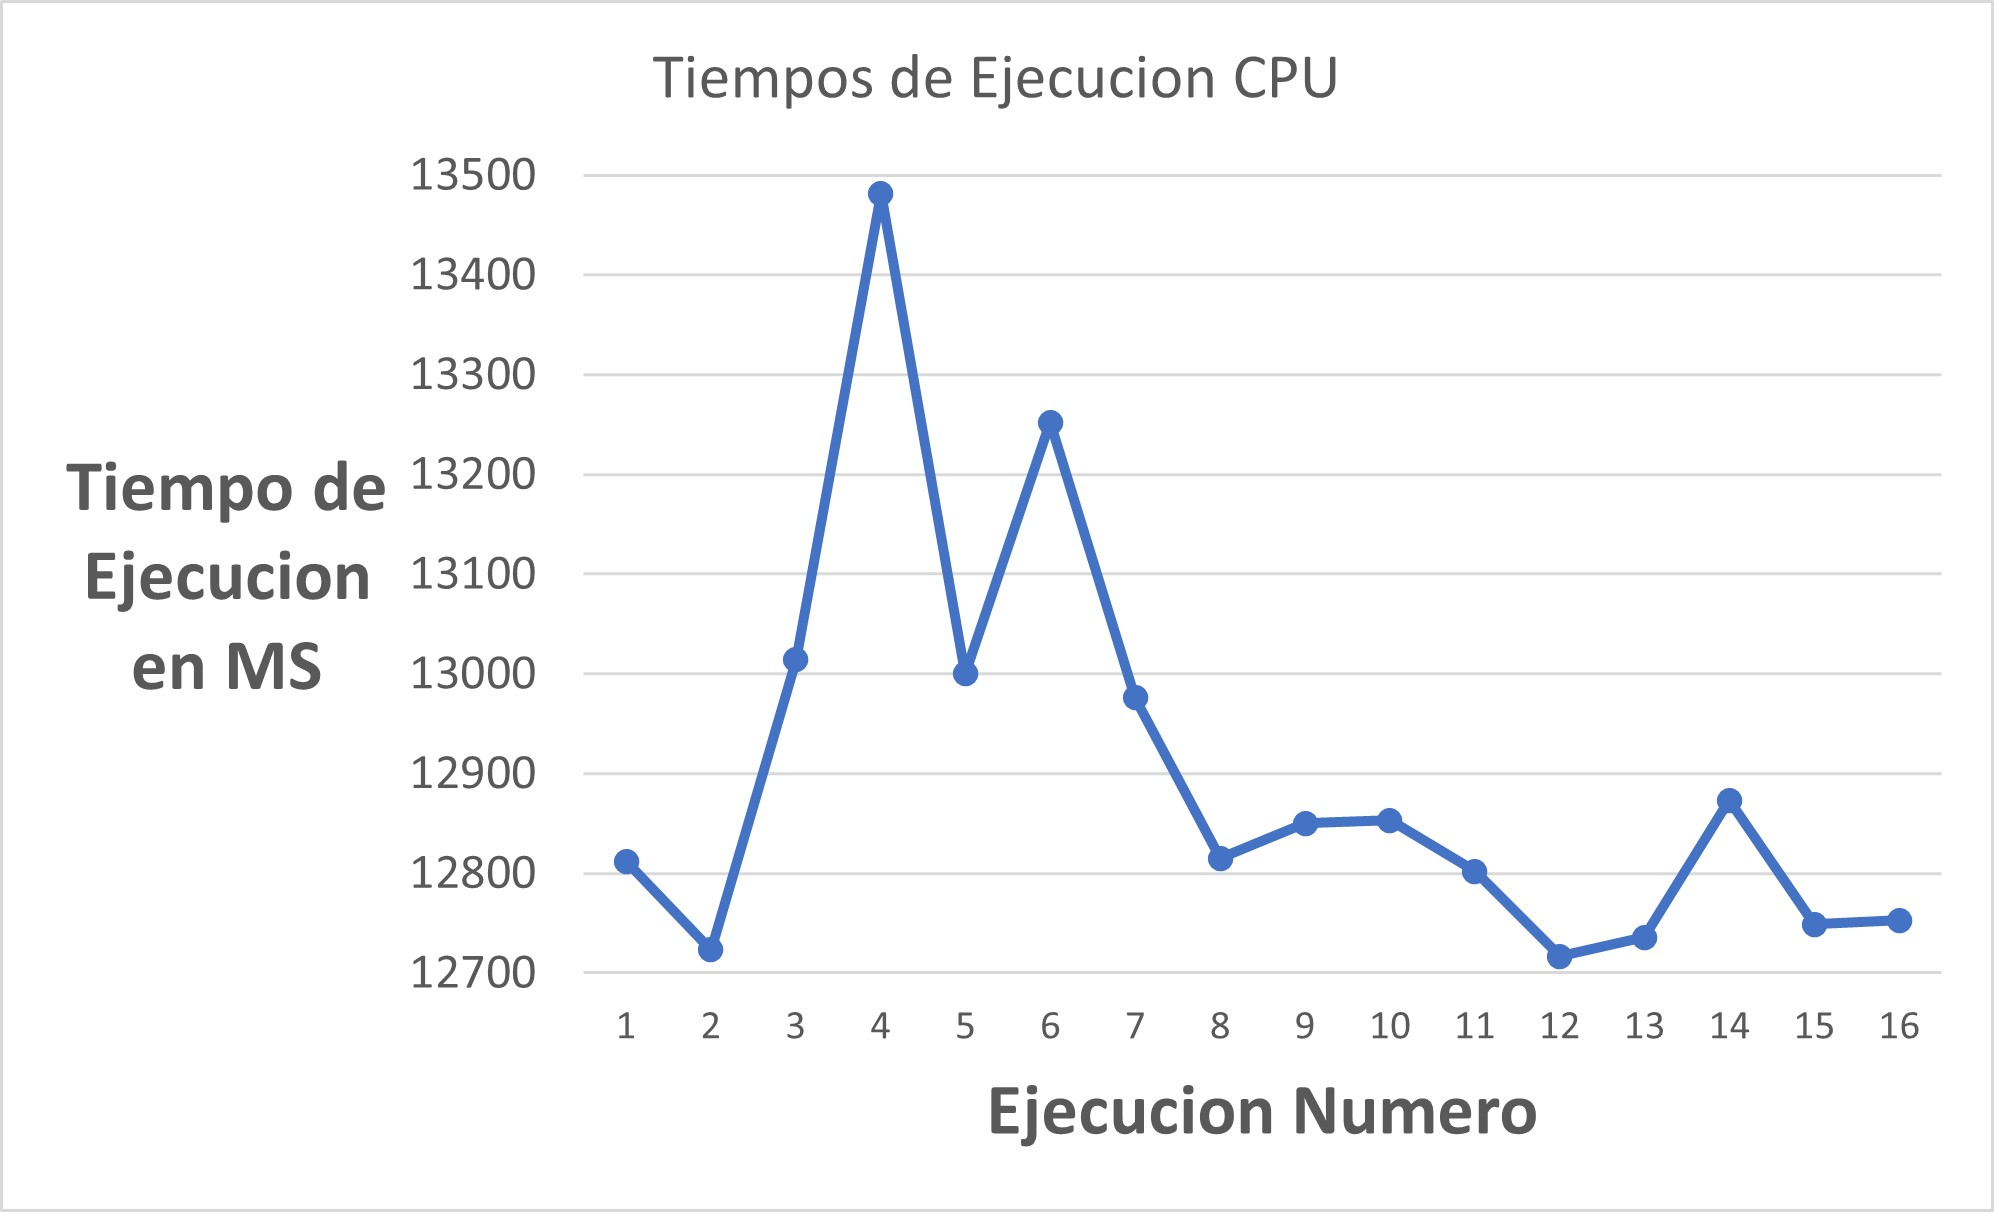

 Como vemos en el grafico el tiempo de ejecucion utilizando la CPU es bastante alto, por lo que para el procesamiento de imagenes mas grandes o si se desea realizar el procesamiento de varias imagenes se tardaria demasiado por lo que es solo recomendable utiliar la CPU solamente para proceso de imagenes en poca cantidad.

Asi como, en este caso, se guarda en el pixel la diferencia de los pixeles de las otras dos imagenes, se podria alterar el algoritmo para que muestre las diferencias solo en la primer foto, en la segunda o para mostrarlas en una nueva mostrando las diferencias de una en un color y las de la otra en otro. De esta forma esta algoritmo puede ser alterardo facilmente para obtener otro output.

# 6 Bibliografia

1. Resta de imagenes para Asteroides Debiles.  http://brucegary.net/A86279/ISfor6128.html

2. Informacion Resta de imagenes. https://en.wikipedia.org/wiki/Image_subtraction

3. Astrofotografia. https://en.wikipedia.org/wiki/Astrophotography
